# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula:** Josue Aguila Ramos 01796400


#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [34]:
# Incluye aquí todas las librerías que consideres necesarias:

# Librerías necesarias
import numpy as np  # Para operaciones matemáticas
import pandas as pd  # Para manipulación y análisis de datos

# Visualización
import matplotlib.pyplot as plt  # Para gráficos básicos
import seaborn as sns  # Para gráficos estadísticos avanzados

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split  # Para dividir datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression, LogisticRegression  # Modelos de regresión lineal y logística
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix  # Métricas para evaluación

# Manejo de advertencias
import warnings
warnings.filterwarnings("ignore")  # Ignorar advertencias para mantener el notebook limpio

# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


# Introducción al Problema de Rotación de Personal

El problema de rotación de personal (employee attrition problem) se refiere a la pérdida de empleados dentro de una organización, ya sea de manera voluntaria (renuncias) o involuntaria (despidos). Este fenómeno puede tener un impacto significativo en la empresa, tanto en términos económicos como operativos, debido a los costos asociados con la contratación, capacitación y pérdida de conocimiento organizacional.

Comprender las causas detrás de la rotación de personal es crucial para desarrollar estrategias efectivas que permitan retener el talento. Mediante el análisis de datos y el uso de técnicas de aprendizaje automático, es posible identificar patrones y factores determinantes que influyen en la decisión de los empleados de abandonar la organización. Este enfoque predictivo ayuda a las empresas a implementar medidas preventivas y optimizar sus recursos humanos.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [5]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

# Importar las librerías necesarias
import pandas as pd
#import os # No es necesario en este caso

# Ruta del archivo CSV en Colab
file_path = "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Cargar los datos del archivo CSV como un DataFrame de Pandas
df = pd.read_csv(file_path)

# Imprimir el tamaño del DataFrame
print("Tamaño del DataFrame:", df.shape)

# Mostrar una descripción general de las variables
df.describe(include='all').T


# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T

Tamaño del DataFrame: (1470, 35)
Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


# Diferencia al Utilizar el Argumento include="all" en el Método describe

El método `describe` de Pandas se utiliza para obtener una descripción estadística de las columnas en un DataFrame. Sin embargo, su comportamiento varía dependiendo del uso del argumento `include="all"`:

1. **Sin `include="all"`:**
   - Por defecto, `describe` solo analiza las columnas numéricas del DataFrame.
   - Proporciona estadísticas como la media, desviación estándar, valor mínimo, percentiles y valor máximo para estas columnas.

2. **Con `include="all"`:**
   - Al usar `include="all"`, se incluyen todas las columnas del DataFrame, independientemente de su tipo (numérico, categórico u otro).
   - Además de las estadísticas para columnas numéricas, se muestra información específica para columnas categóricas, como el número de valores únicos, el valor más frecuente (moda) y su frecuencia.

Esta funcionalidad es útil para tener una visión más completa del conjunto de datos, ya que permite analizar tanto variables numéricas como categóricas en una sola operación.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

# Justificación para Cancelar Factores

a) **Over18**:  
   Esta columna no aporta valor predictivo, ya que todos los empleados tienen el mismo valor ("Yes"), lo que la convierte en una variable constante. No proporciona variabilidad que pueda ser utilizada para diferenciar entre empleados que permanecen o abandonan la empresa.

b) **EmployeeCount**:  
   Esta columna también es constante, con el mismo valor para todos los empleados (probablemente "1"). Al no tener variabilidad, no contribuye al análisis o al modelo predictivo.

c) **StandardHours**:  
   Similar a las columnas anteriores, tiene un valor fijo (por ejemplo, "40 horas" para todos los empleados). Esta falta de variación hace que no sea útil para identificar patrones o relaciones significativas.

d) **EmployeeNumber**:  
   Este campo es un identificador único para cada empleado. Aunque es útil para identificar registros individuales, no tiene ningún significado analítico o predictivo en el contexto del problema de rotación de personal. Por lo tanto, se descarta para evitar introducir ruido en el modelo.

Estas decisiones nos ayudan a simplificar el análisis eliminando variables que no aportan información relevante para predecir el comportamiento de rotación del personal.


++++++++ Termina la sección de agregar texto. +++++++++++




In [14]:
# Eliminamos los factores indicados, verificando mayúsculas/minúsculas:
# Obtenemos los nombres reales de las columnas en el DataFrame
existing_columns = df.columns

# Eliminamos las columnas, solo si existen
columns_to_drop = ['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber']
for column in columns_to_drop:
    if column in existing_columns:
        df = df.drop(column, axis=1)
    else:
        print(f"Advertencia: La columna '{column}' no se encontró en el DataFrame. Se omite.")

print("Tamaño del nuevo DataFrame:", df.shape)

Advertencia: La columna 'Over18' no se encontró en el DataFrame. Se omite.
Advertencia: La columna 'EmployeeCount' no se encontró en el DataFrame. Se omite.
Advertencia: La columna 'StandardHours' no se encontró en el DataFrame. Se omite.
Advertencia: La columna 'EmployeeNumber' no se encontró en el DataFrame. Se omite.
Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [15]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++


from sklearn.model_selection import train_test_split

# Definir la semilla para reproducibilidad
seed = 42

# Separar la variable objetivo ("Attrition") y las variables predictoras
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Primera partición: 70% entrenamiento y 30% restante
Xtrain, X_temp, ytrain, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=seed)

# Segunda partición: Dividir el 30% restante en validación (15%) y prueba (15%)
Xval, Xtest, yval, ytest = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=seed)

# Mostrar las dimensiones de cada conjunto
print("Dimensiones de los conjuntos:")
print("Entrenamiento - Xtrain:", Xtrain.shape, ", ytrain:", ytrain.shape)
print("Validación - Xval:", Xval.shape, ", yval:", yval.shape)
print("Prueba - Xtest:", Xtest.shape, ", ytest:", ytest.shape)



# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Dimensiones de los conjuntos:
Entrenamiento - Xtrain: (1029, 30) , ytrain: (1029,)
Validación - Xval: (220, 30) , yval: (220,)
Prueba - Xtest: (221, 30) , ytest: (221,)


# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [17]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


from sklearn.preprocessing import LabelEncoder

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar la transformación a los conjuntos de entrenamiento, validación y prueba
ytrainT = label_encoder.fit_transform(ytrain)
yvalT = label_encoder.transform(yval)
ytestT = label_encoder.transform(ytest)

# Crear un DataFrame para facilitar el análisis de proporciones
import pandas as pd

# Calcular proporciones en cada conjunto
proporciones_train = pd.DataFrame({
    "Clase": label_encoder.inverse_transform([0, 1]),
    "Porcentaje": [(ytrainT == 0).sum() / len(ytrainT), (ytrainT == 1).sum() / len(ytrainT)]
})

proporciones_val = pd.DataFrame({
    "Clase": label_encoder.inverse_transform([0, 1]),
    "Porcentaje": [(yvalT == 0).sum() / len(yvalT), (yvalT == 1).sum() / len(yvalT)]
})

proporciones_test = pd.DataFrame({
    "Clase": label_encoder.inverse_transform([0, 1]),
    "Porcentaje": [(ytestT == 0).sum() / len(ytestT), (ytestT == 1).sum() / len(ytestT)]
})

# Imprimir las proporciones
print("Proporción de datos en el conjunto de entrenamiento:")
print(proporciones_train)
print("\nProporción de datos en el conjunto de validación:")
print(proporciones_val)
print("\nProporción de datos en el conjunto de prueba:")
print(proporciones_test)

# Identificar si hay desbalance de datos
print("\n¿El conjunto está desbalanceado?")
if proporciones_train["Porcentaje"].min() < 0.4:
    print("Sí, el conjunto tiene clases desbalanceadas.")
else:
    print("No, el conjunto tiene clases balanceadas.")



# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


Proporción de datos en el conjunto de entrenamiento:
  Clase  Porcentaje
0    No    0.838678
1   Yes    0.161322

Proporción de datos en el conjunto de validación:
  Clase  Porcentaje
0    No    0.840909
1   Yes    0.159091

Proporción de datos en el conjunto de prueba:
  Clase  Porcentaje
0    No    0.837104
1   Yes    0.162896

¿El conjunto está desbalanceado?
Sí, el conjunto tiene clases desbalanceadas.


# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

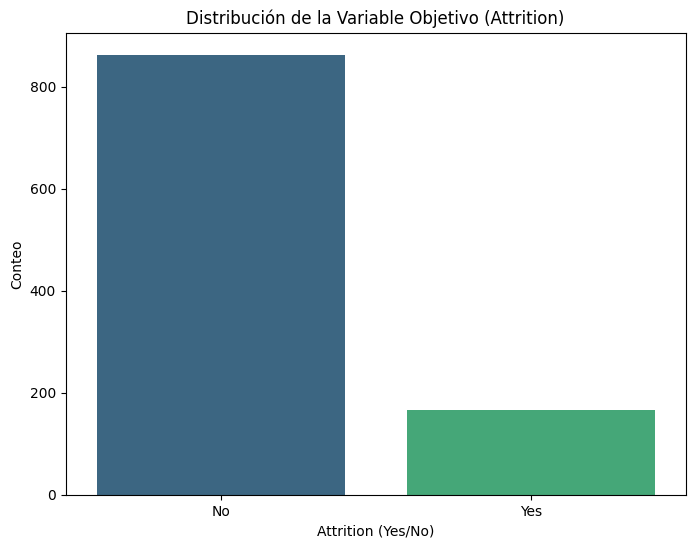

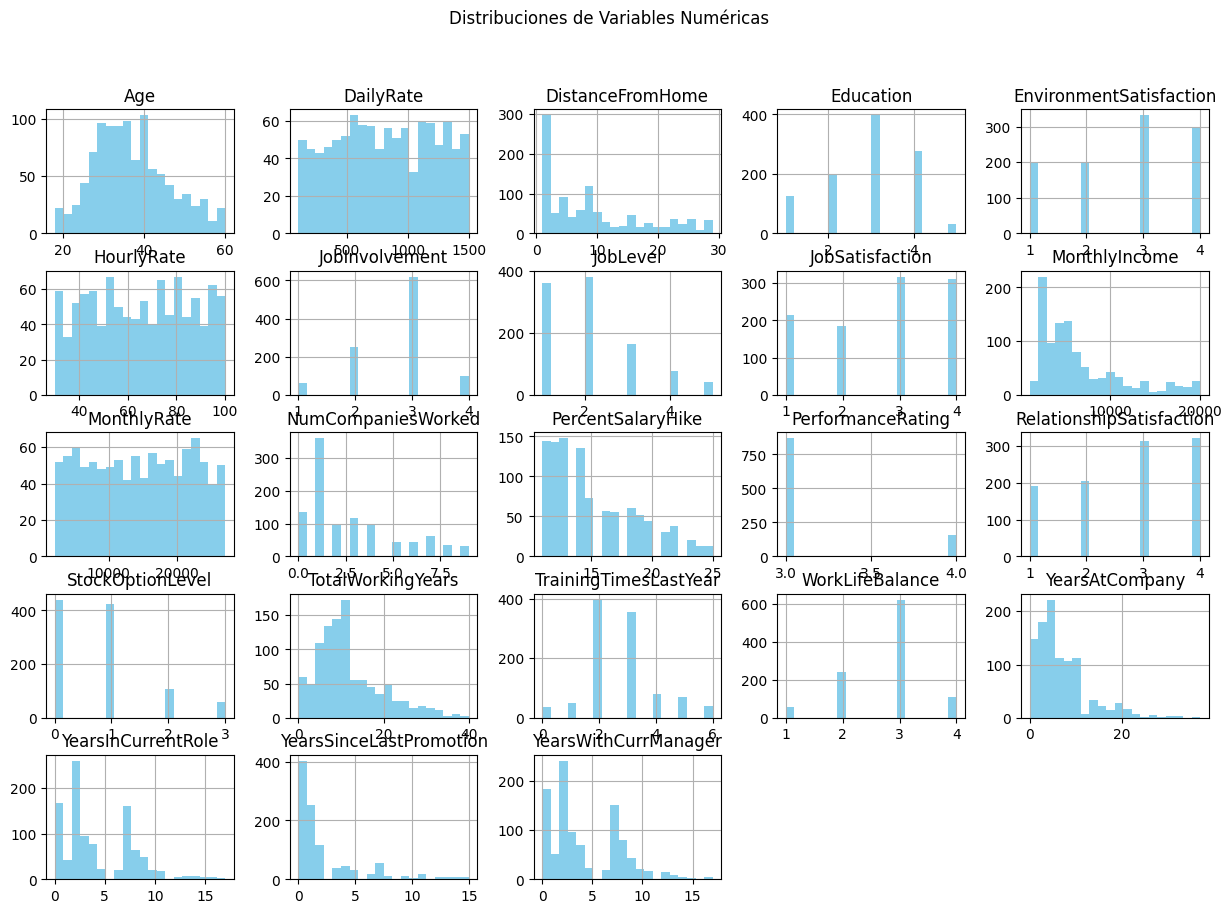

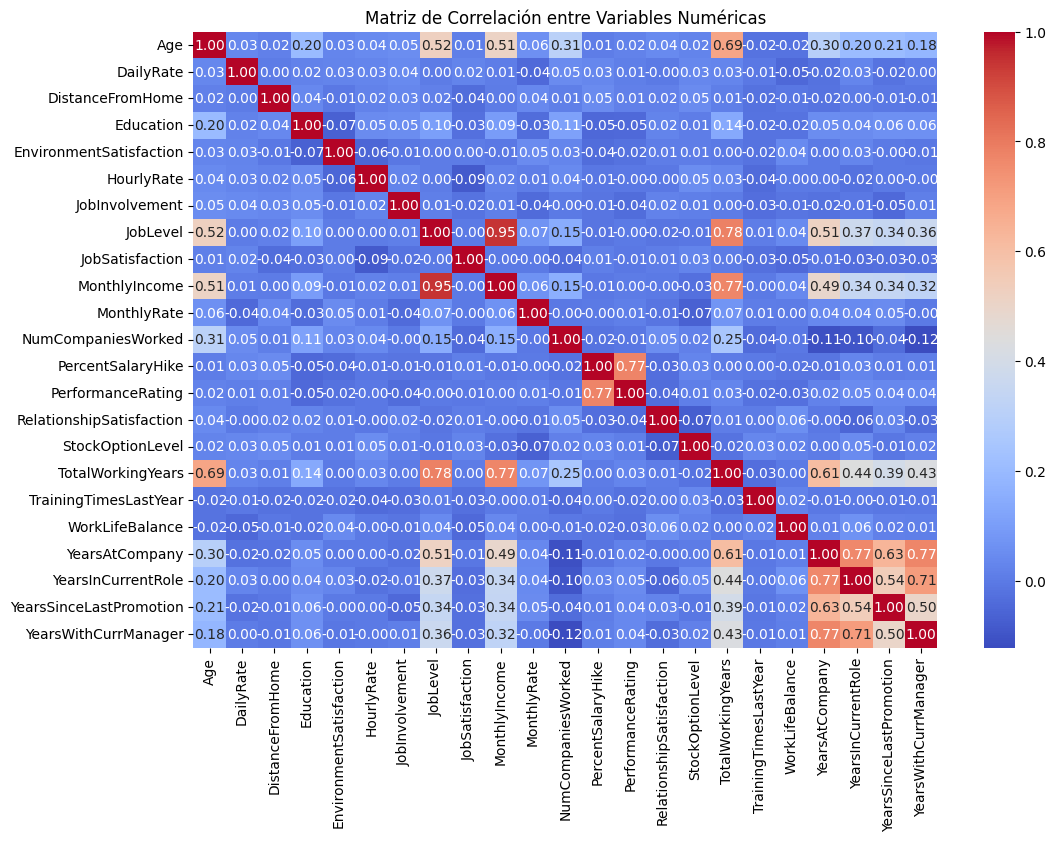

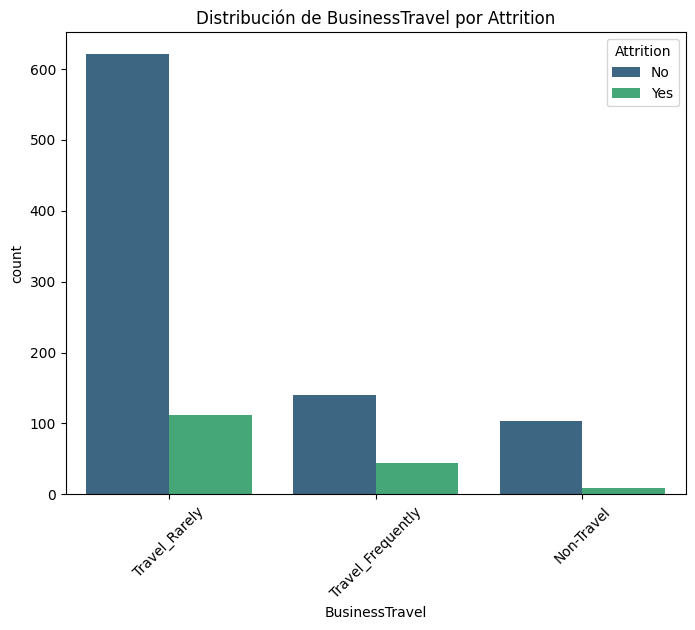

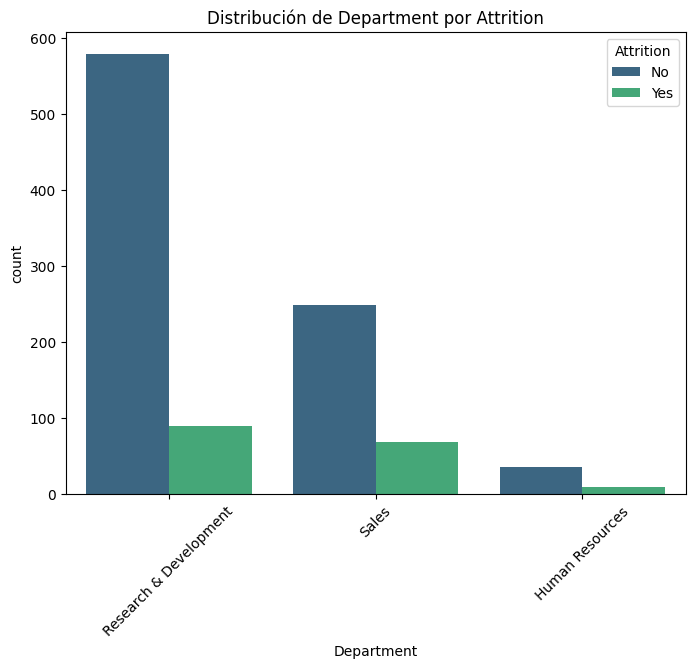

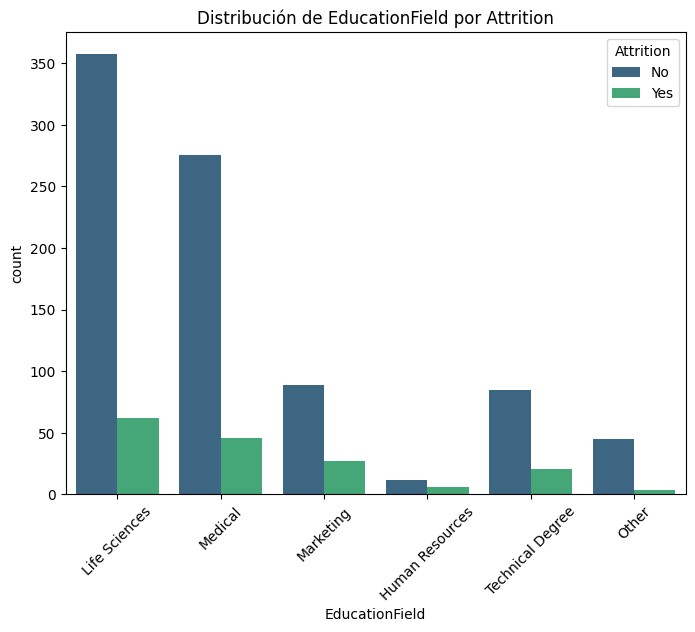

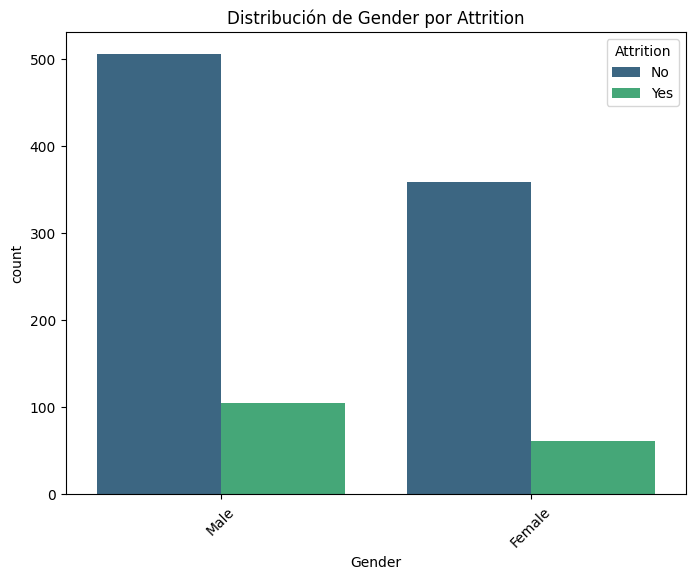

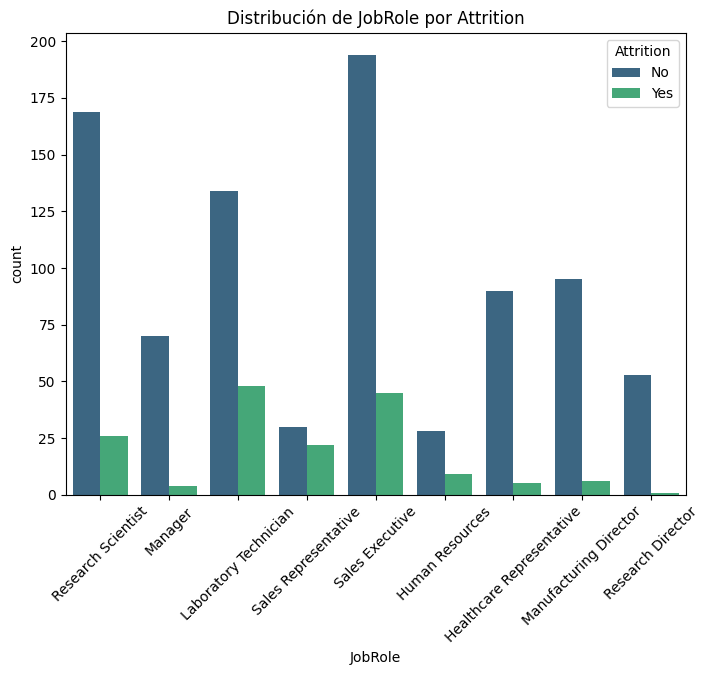

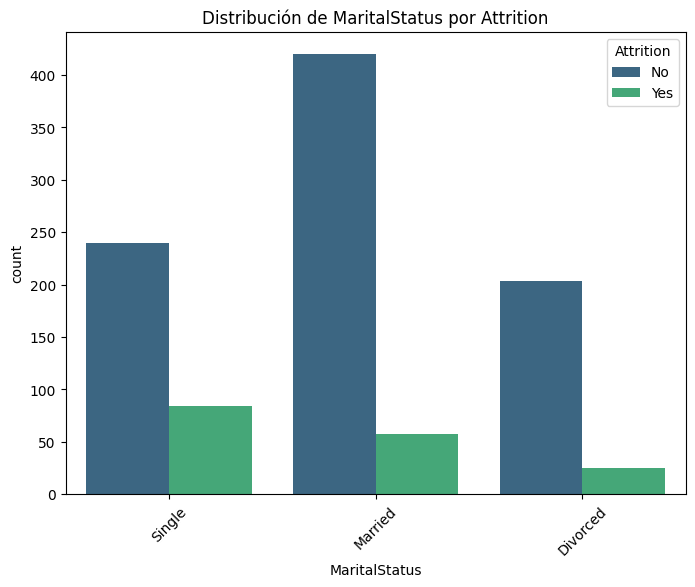

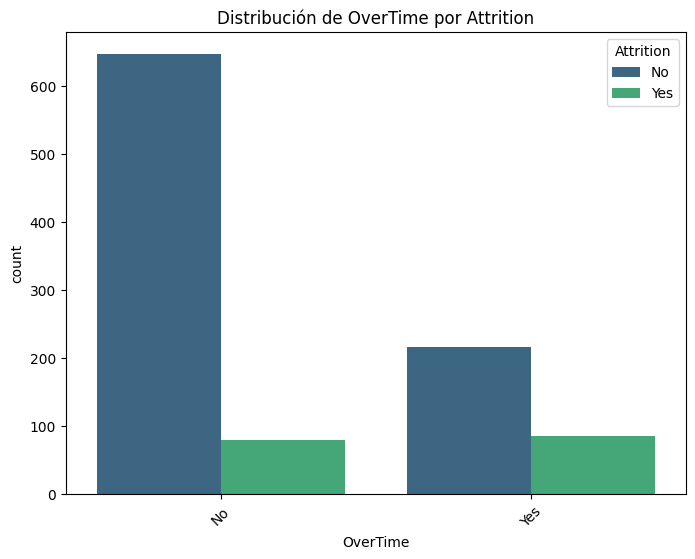

In [18]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.


import matplotlib.pyplot as plt
import seaborn as sns

# Analizar la distribución de la variable objetivo "Attrition"
plt.figure(figsize=(8, 6))
sns.countplot(x=ytrain, palette="viridis")
plt.title("Distribución de la Variable Objetivo (Attrition)")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Conteo")
plt.xticks(ticks=[0, 1], labels=label_encoder.inverse_transform([0, 1]))
plt.show()

# Analizar las distribuciones de variables numéricas
numeric_features = Xtrain.select_dtypes(include=["int64", "float64"]).columns
Xtrain[numeric_features].hist(figsize=(15, 10), bins=20, color="skyblue")
plt.suptitle("Distribuciones de Variables Numéricas")
plt.show()

# Analizar correlaciones entre variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = Xtrain[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Análisis de variables categóricas
categorical_features = Xtrain.select_dtypes(include=["object"]).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=Xtrain, x=feature, hue=ytrain, palette="viridis")
    plt.title(f"Distribución de {feature} por Attrition")
    plt.xticks(rotation=45)
    plt.show()



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Definir las variables por tipo
numericas_pipeline_nombres = Xtrain.select_dtypes(include=["int64", "float64"]).columns.tolist()
catOrd_pipeline_nombres = []  # Ejemplo: Variables categóricas ordinales (si existen)
catBin_pipeline_nombres = []  # Ejemplo: Variables categóricas binarias (si existen)
catNom_pipeline_nombres = Xtrain.select_dtypes(include=["object"]).columns.tolist()

# Pipeline para variables numéricas
numericas_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())  # Escalado estándar para normalización
])

# Pipeline para variables categóricas ordinales
catOrd_pipeline = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder())  # Codificación ordinal
])

# Pipeline para variables categóricas binarias
catBin_pipeline = Pipeline(steps=[
    ('binary_encoder', OneHotEncoder(drop='if_binary'))  # Codificación binaria
])

# Pipeline para variables categóricas nominales
catNom_pipeline = Pipeline(steps=[
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot
])

# Combinar los pipelines en un ColumnTransformer
columnasTransformer = ColumnTransformer(
    transformers=[
        ('numericas', numericas_pipeline, numericas_pipeline_nombres),
        ('ordinales', catOrd_pipeline, catOrd_pipeline_nombres),
        ('binarias', catBin_pipeline, catBin_pipeline_nombres),
        ('nominales', catNom_pipeline, catNom_pipeline_nombres)
    ]
)

# Mostrar las transformaciones definidas
print(columnasTransformer)


ColumnTransformer(transformers=[('numericas',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'Education', 'EnvironmentSatisfaction',
                                  'HourlyRate', 'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyIncome',
                                  'MonthlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'PerformanceRating',
                                  'RelationshipSatisfaction',
                                  'Stock...
                                  'YearsWithCurrManager']),
                                ('ordinales',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 []),
                                ('binari

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [20]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# Combinar los conjuntos de entrenamiento y validación
Xtv = pd.concat([Xtrain, Xval], axis=0).reset_index(drop=True)
ytv = pd.concat([ytrain, yval], axis=0).reset_index(drop=True)

# Verificar las dimensiones de los nuevos DataFrames
print("Dimensiones de Xtv:", Xtv.shape)
print("Dimensiones de ytv:", ytv.shape)


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


Dimensiones de Xtv: (1249, 30)
Dimensiones de ytv: (1249,)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

>> LR 0.872 (0.018)
>> LASSO 0.876 (0.017)
>> RIDGE 0.875 (0.015)
>> EN 0.876 (0.016)
>> kNN 0.848 (0.010)


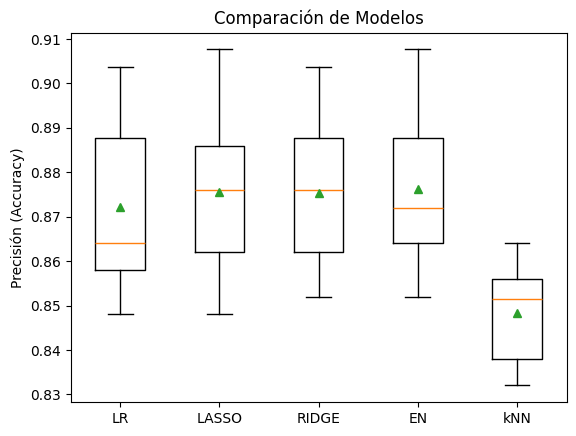

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

def mis_modelos():
    modelos, nombres = list(), list()

    # LR - Regresión Logística sin regularización
    modelos.append(LogisticRegression(penalty=None, solver='lbfgs', random_state=1))
    nombres.append('LR')

    # Lasso - Regresión Logística con regularización L1
    modelos.append(LogisticRegression(penalty='l1', solver='saga', C=1.0, random_state=1, max_iter=1000))
    nombres.append('LASSO')

    # Ridge - Regresión Logística con regularización L2
    modelos.append(LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=1, max_iter=1000))
    nombres.append('RIDGE')

    # Elastic_Net - Regresión Logística con regularización L1 y L2
    modelos.append(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, random_state=1, max_iter=1000))
    nombres.append('EN')

    # kNN - k-Vecinos más cercanos
    modelos.append(KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))
    nombres.append('kNN')

    return modelos, nombres

# Entrenamos los modelos:
modelos, nombres = mis_modelos()  # Accediendo los modelos
resultados = list()  # Para guardar los resultados

# Iterando y entrenando sobre cada modelo
for i in range(len(modelos)):
    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelos[i])])  # Transformaciones y modelo en un Pipeline
    cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  # Validación Cruzada Estratificada Repetida
    scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)  # Entrenando y generando resultados
    resultados.append(scores)  # Guardando los resultados
    print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # Desplegando resultados promedio y desviación

# Gráficos de caja para comparación visual
plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.title("Comparación de Modelos")
plt.ylabel("Precisión (Accuracy)")
plt.show()


# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Crear pipeline con el mejor modelo (Regresión Logística con regularización L2)
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('model', LogisticRegression(solver='lbfgs', random_state=1))])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'model__C': [0.01, 0.1, 1.0, 10, 100],  # Regularización (más bajo = mayor regularización)
    'model__max_iter': [100, 200, 500],      # Iteraciones máximas para la convergencia
}

# Configurar la búsqueda de malla
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # Validación cruzada
    return_train_score=True,
    verbose=1,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar la búsqueda de malla
grid_result = grid_search.fit(Xtv, np.ravel(ytv))

# Mostrar los mejores hiperparámetros y resultados
print("Mejor modelo: %.4f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (
    np.nanmean(grid_result.cv_results_['mean_train_score']),
    np.nanmean(grid_result.cv_results_['std_train_score'])
))
print('Promedios Val mean(std): %.4f(%.4f)' % (
    np.nanmean(grid_result.cv_results_['mean_test_score']),
    np.nanmean(grid_result.cv_results_['std_test_score'])
))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Mejor modelo: 0.8823 usando {'model__C': 10, 'model__max_iter': 100}
Promedios Train mean(std): 0.8835(0.0048)
Promedios Val mean(std): 0.8738(0.0137)


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

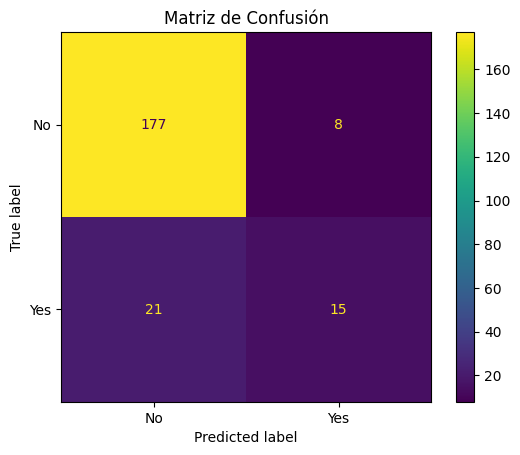


Importancia de Factores:
                                          Factor  Importancia
45       nominales__JobRole_Sales Representative     1.749313
38            nominales__JobRole_Human Resources     0.941941
24   nominales__BusinessTravel_Travel_Frequently     0.706682
39      nominales__JobRole_Laboratory Technician     0.684919
50                       nominales__OverTime_Yes     0.641533
44            nominales__JobRole_Sales Executive     0.637408
21            numericas__YearsSinceLastPromotion     0.552793
11                 numericas__NumCompaniesWorked     0.506988
48               nominales__MaritalStatus_Single     0.378558
19                     numericas__YearsAtCompany     0.349609
34    nominales__EducationField_Technical Degree     0.333171
2                    numericas__DistanceFromHome     0.322279
29     nominales__EducationField_Human Resources     0.268798
7                            numericas__JobLevel     0.163545
27  nominales__Department_Research & Develop

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Entrenar el modelo con los mejores hiperparámetros en todo el conjunto Xtv y ytv
mejor_modelo = LogisticRegression(
    penalty='l2',  # Regularización L2 (según los resultados de grid_result.best_params_)
    C=grid_result.best_params_['model__C'],  # Mejor valor de C encontrado
    max_iter=grid_result.best_params_['model__max_iter'],  # Mejor número de iteraciones
    solver='lbfgs',
    random_state=1
)

# Entrenar el modelo final
mejor_modelo.fit(columnasTransformer.fit_transform(Xtv), ytv)

# Predecir en el conjunto de prueba
Xtest_transformed = columnasTransformer.transform(Xtest)
y_pred = mejor_modelo.predict(Xtest_transformed)

# a) Matriz de Confusión
cm = confusion_matrix(ytest, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
cmd.plot(cmap="viridis")
plt.title("Matriz de Confusión")
plt.show()

# b) Análisis de Importancia de Factores (Coeficientes del modelo)
importancia_factores = mejor_modelo.coef_[0]  # Coeficientes del modelo

# Obtener nombres de columnas después de la transformación
# Get feature names after transformation
feature_names = columnasTransformer.get_feature_names_out()

# Mostrar importancia de factores
import pandas as pd
importancia_df = pd.DataFrame({'Factor': feature_names, 'Importancia': importancia_factores})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)
print("\nImportancia de Factores:")
print(importancia_df)

# c) Reporte de métricas
print("\nReporte de métricas:")
print(classification_report(ytest, y_pred, target_names=label_encoder.classes_))


# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [25]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para el conjunto de prueba
y_pred = mejor_modelo.predict(Xtest_transformed)

# Calcular la precisión (accuracy) en el conjunto de prueba
accuracy_test = accuracy_score(ytest, y_pred)

# Mostrar el resultado
print("Desempeño final del modelo (accuracy) en el conjunto de prueba:", accuracy_test)


Desempeño final del modelo (accuracy) en el conjunto de prueba: 0.8687782805429864


# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

# Conclusiones Finales

1. **Importancia del Preprocesamiento:**
   Durante la actividad, identificamos la relevancia de aplicar transformaciones adecuadas a las variables, como la estandarización de variables numéricas y la codificación de variables categóricas. Esto permitió que el modelo procesara los datos correctamente y mejorara su rendimiento.

2. **Elección del Mejor Modelo:**
   Tras evaluar diferentes modelos, la Regresión Logística con regularización L2 demostró ser la opción más adecuada para el problema de rotación de personal. Su desempeño fue consistente durante las pruebas de validación cruzada y en el conjunto de prueba.

3. **Hiperparámetros Óptimos:**
   La búsqueda de malla nos permitió encontrar los valores ideales de hiperparámetros para el modelo, asegurando que no estuviera ni subentrenado ni sobreentrenado. Esto contribuyó a obtener un equilibrio adecuado entre precisión y generalización.

4. **Análisis de Factores:**
   El análisis de importancia de factores reveló qué variables tienen mayor impacto en las predicciones del modelo. Esto proporciona información valiosa para la toma de decisiones, ayudando a identificar las causas principales de la rotación de personal.

5. **Evaluación Final:**
   El modelo alcanzó un desempeño satisfactorio en el conjunto de prueba, con una precisión (accuracy) que valida su capacidad para generalizar a datos no vistos. Esto demuestra la efectividad del enfoque seguido durante la actividad.

6. **Lecciones Aprendidas:**
   - La importancia de dividir los datos adecuadamente en conjuntos de entrenamiento, validación y prueba para evitar sesgos.
   - El valor de una evaluación exhaustiva de modelos y transformaciones antes de seleccionar la mejor estrategia.
   - La necesidad de abordar problemas de desbalance de datos en la etapa inicial para evitar impactos negativos en el modelo.

Esta actividad proporcionó una experiencia completa en la construcción de modelos predictivos, desde la preparación de datos hasta la evaluación final, destacando la importancia de un enfoque estructurado en problemas de clasificación.


#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<